# Proyecto final. Temas selectos de física computacional II
## Analisis de un dataset e implementación de un modelo de machine learning

## **Estudio de las relaciones de medidas biométricas con un posible diagnóstico de diabetes.**

En el siguiente notebook se realizará un análisis detallado de algunas medidas biométricas tomadas a un conjunto de **pacientes femeninos de al menos 21 años**, medidas que tienen como propósito determinar si existe alguna relación de algunas mediciones con un diagnóstico de diabetes.\
Se pretende además, implementar un modelo de machine learning que prediga si un futuro paciente puede o no tener un diagnóstico de diabetes positivo de acuerdo a algunas medidas que se le tomen.

## **Objetivos:**
- Determinar si existe una correlación entre algunas medidas y un diagnóstico positivo (o negativo) de diabetes en pacientes femeninas de al menos 21 años
- Implementar un modelo de machine learning que ayude a predecir un diagnóstico para futuros pacientes que no se encuentren en el dataset

Autores:
- *Jesus Priego Morales*
- *Ricardo Silva Vergara*

## Librerias utilizadas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

# Lectura del dataset

In [ ]:
#Primero se lee el archivo que vamos a analizar el cual se encuentra en la misma carpeta del proyecto
datos=pd.read_csv('/content/drive/MyDrive/Proyecto_Final_BD/diabetes.csv')

In [ ]:
#Se muestra el dataframe
datos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Como un paso inicial, miraremos a grandes razgos si nuestro data set tiene los tipos de datos adecuados
#En caso de existir datos NaN se rellenarán o se eliminará la columna según sea el caso
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Podemos observar que el dataset no tiene nigún dato del tipo NaN, además de que cada columna tiene datos numéricos con los cuales se puede sacar estadística por lo cual no es necesario en primera estancia, hacerle una modificación mayor al data set**

In [ ]:
#Ahora como segundo acercamiento al análisis obtendremos una vista global de las principales medidas descriptivas de nuestro dataset
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Lo que se puede decir después de una vista general a los datos son las siguientes observaciones:
- Los diagnósticos positivos y negativos para diabetes están desproporcionados, es decir que hay una cantidad mayor de casos negativos que positivos, lo cual presenta un problema a la hora de entrenar nuestro modelo de machine learning.
- Mismo problema podemos observar en la columna de la insulina, se aprecia que la mediana y media no coinciden y de hecho sus valores distan mucho el uno del otro por lo cual podemos hacer una primera hipotesis que el factor más importante a la hora de determinar un diagnóstico puede ser simplemente estudiando los niveles de insulina

#Primera aproximación a conocer las medidas que más determinan un diagnóstico de diabetes

**En este apartado comenzaremos a graficar cada columna en un histograma, de manera que haremos distinción entre aquellos casos que son positivos y negativos para algunas variables que sean categoricas o numéricas** 

**Interesa saber la proporción de gente que es diagnosticada según su edad.**

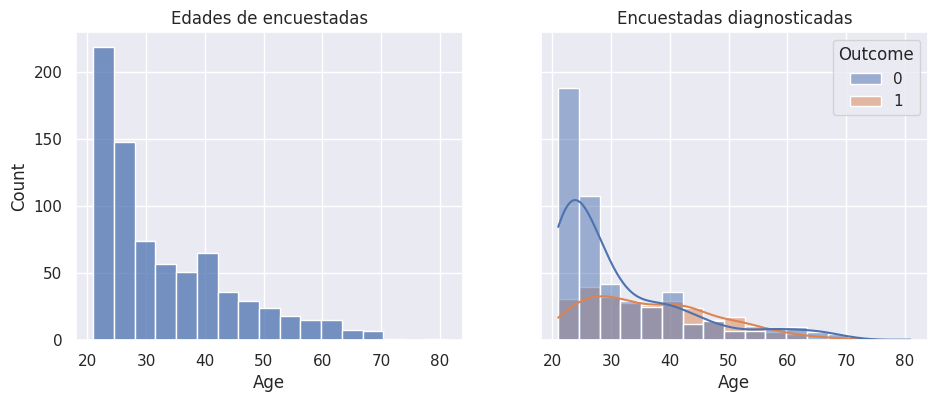

In [ ]:
#Se grafica en un histograma las edades de las encuestadas haciendo distinción entre los diagnosticos positivos y negativos
fig,axes=plt.subplots(1,2,sharey=True,figsize=(11,4))
sns.histplot(data=datos,x='Age',ax=axes[0]).set_title('Edades de encuestadas')
sns.histplot(data=datos,x='Age',ax=axes[1],hue='Outcome',kde=True).set_title('Encuestadas diagnosticadas')
plt.show()

**Observamos que hay una mayor proporción de personas jovenes (entre 20 y 30 años) que fueron encuestadas por lo cual es posible que esto también ocasione cierto sesgo en los datos**\
**Además, las pacientes que a simple vista tienen una proporción entre igual o mayor numero de diagnosticadas, son aquellas que están entre las edades de 30 y 55 años**

Una de las preguntas que pueden surgir es si aquellas que han sido diagnosticadas acaso están relacionados a un nivel de insulina atipico, así que usaremos un box plot para identificar la existencia de estos datos 

Text(0.5, 1.0, 'datos atípicos de insulina')

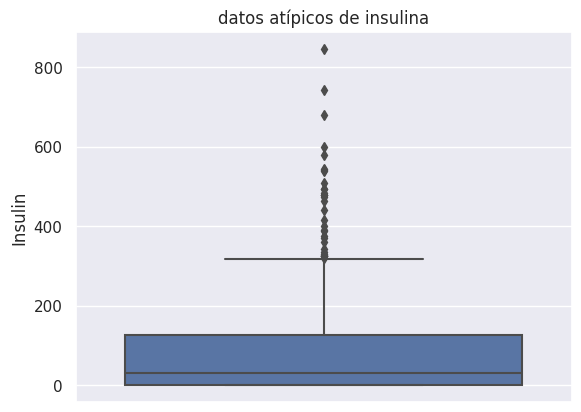

In [ ]:
#Graficamos un bloxplot de la insulina
sns.boxplot(data=datos,y='Insulin').set_title('datos atípicos de insulina')

**Apreciamos que sí existen outliers en esta columna datos por lo cual fltraremos aquellos datos atipicos y los graficaremos para ver si aquellos presentan mayor niveles de diagnosicadas**

In [ ]:
#Calculamos el IQR para los datos de la columna de insulina
IQR_Insulina=127.25000
#Calculamos aquellos valores que separan los datos tipicos de los outliers
#valor inferior
Out_Insulin_D=0-((1.5)*IQR_Insulina)
#Valor superior
Out_Insulin_U=127.25000+((1.5)*IQR_Insulina)
#Creamos 2 dataframe que separen a los datos tipicos y atipicos de la insulina
Insulina_Atipica=datos[(datos.Insulin<Out_Insulin_D) | (datos.Insulin>Out_Insulin_U)]
Insulina_Tipica=datos[~((datos.Insulin<Out_Insulin_D) | (datos.Insulin>Out_Insulin_U))]

In [ ]:
Insulina_Tipica

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
Insulina_Atipica

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


Text(0.5, 1.0, 'Insulina Típica')

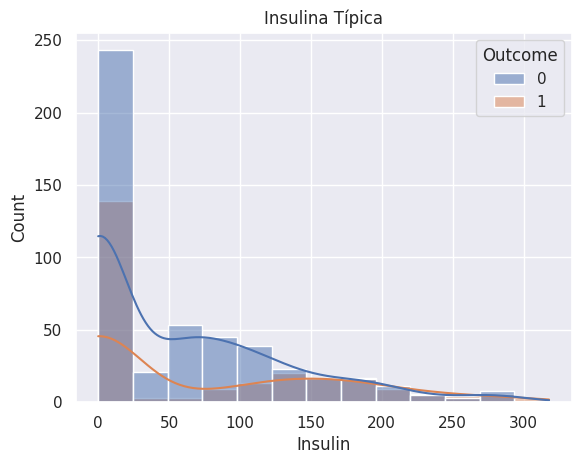

In [ ]:
#Graficamos ambos casos dataframes haciendo énfasis en los casos postivos y negativos
#Primero los casos típicos
sns.histplot(data=Insulina_Tipica,x='Insulin',hue='Outcome',kde=True).set_title('Insulina Típica')

Text(0.5, 1.0, 'Insulina atipica')

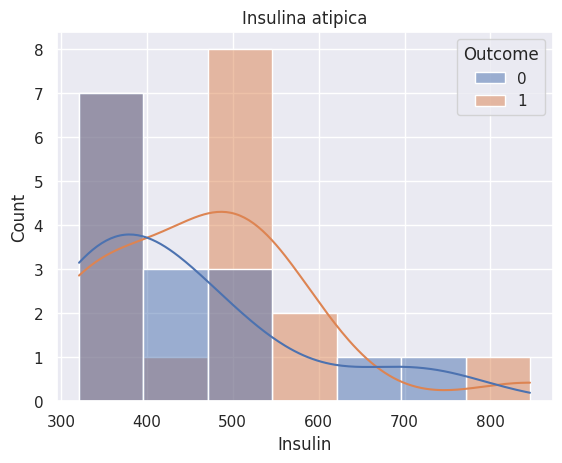

In [ ]:
#Ahora los casos atipicos
sns.histplot(data=Insulina_Atipica,x='Insulin',hue='Outcome',kde=True).set_title('Insulina atipica')

**Observamos que nuestras hipotesis fueron correctas, pues se aprecia que para valores tipicos, los casos positivos presentan una curva de densidad siempre menor o igual a los casos negativos**\
**Por otro lado, para los valores atipicos se tiene que hay algunos para los cuales dependiendo de los niveles registrados, se tiene una curva de densidad mayor para el caso de un disgnóstico positivo**

**Otro posible indicador son los niveles de glucosa, así que de igual manera vemos si existen algunos outliers dentro de estos datos**

Text(0.5, 1.0, 'Valores atipicos de glucosa')

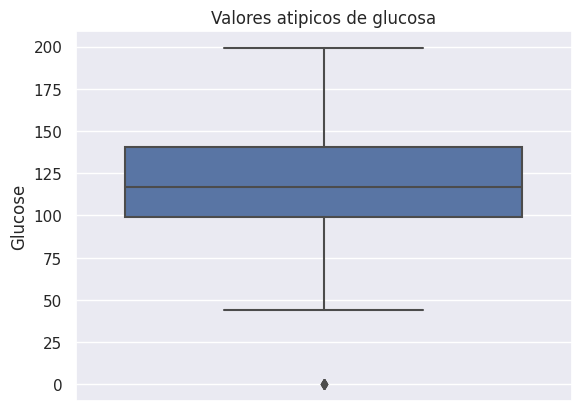

In [ ]:
#Realizamos un boxplot en busca de valores atípicos para la glucosa
sns.boxplot(data=datos,y='Glucose').set_title('Valores atipicos de glucosa')

**Apreciamos que no se da el caso de que existan demasiados valores atipicos, por lo cual dejaremos este sin filtrar y sólo veremos cuál es la proporción de gente diagnosticada de acuerdo a sus niveles de glucosa**

Text(0.5, 1.0, 'Diagnósticos de acuerdo a los niveles de glucosa')

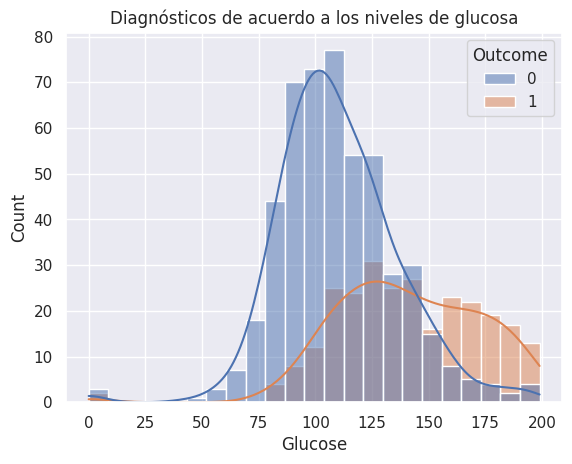

In [ ]:
#Se grafican la frecuencia de los niveles de glucosa haciendo distinción entre los diagnosticos postivos y negativos
sns.histplot(data=datos,x='Glucose',hue='Outcome',kde=True).set_title('Diagnósticos de acuerdo a los niveles de glucosa')

**Observamos que en este caso sí hay una clasa tendencia la cual es que entre mayores los niveles de glucosa, mayor es el riesgo de dar positivo a la enfermedad, donde la proporción de casos positivos se hace mayor a partir de valores por encima de 150**

**Ahora haciendo un análisis de que relación hay de los diagnósticos con el número de embarazos**

<Axes: xlabel='Pregnancies', ylabel='Count'>

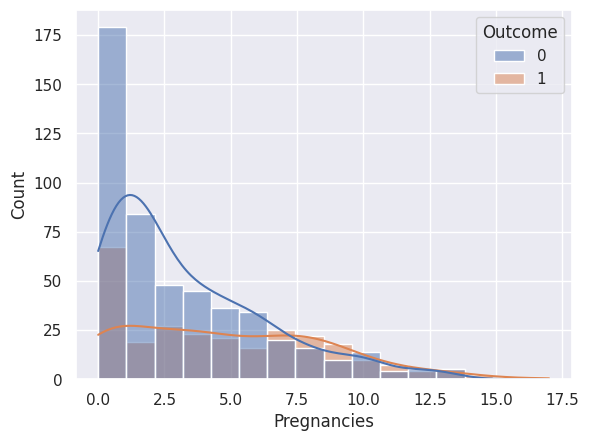

In [ ]:
#Grafica de un histograma de embarazos haciendo la distinción entre disgnosticos positivos y negativos
sns.histplot(data=datos,x='Pregnancies',hue='Outcome',kde=True)

**Observamos que se tiene una mayor proporción de gente diagnosticada en cuanto aumentan el número de embarazos, sin embargo antes de dar una conclusión, es posible que esto esté además relacionado con la edad, por lo cual quizá sea más una tendencía de edad que de los embarazos como tal por lo cual haremos un scatterplot para ver si hay alguna relación lineal entre estas dos variables**

<Axes: xlabel='Age', ylabel='Pregnancies'>

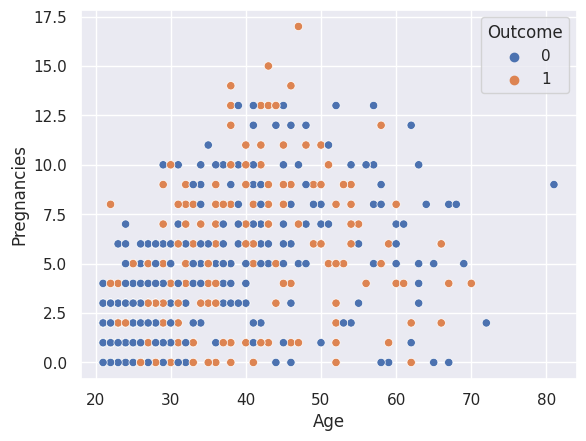

In [ ]:
#Scatter plot, entre los datos de embarazos y edad
sns.scatterplot(data=datos,y='Pregnancies',x='Age',hue='Outcome')

**Por lo que observamos, no es el caso de que se te una relación lineal, sin embargo podemos ver que tanta correlación hay entre estos dos datos**

**Ahora hacemos el mismo análisis para los datos restantes para ver cuáles de ellos presentan un factor más determinante para realizar un diagnóstico postivo**

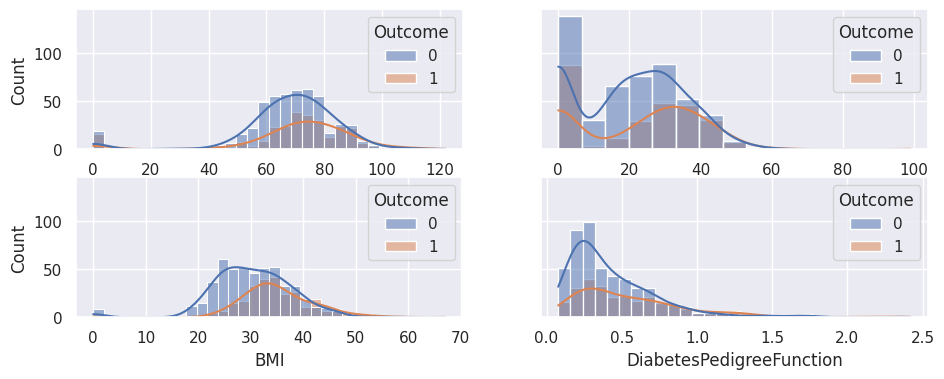

In [ ]:
#Histogramas de los datos resultantes que no nos llamaron tanto la atención en un principio
fig,axes=plt.subplots(2,2,sharey=True,figsize=(11,4))
sns.histplot(data=datos,x='BloodPressure',ax=axes[0,0],hue='Outcome',kde=True)
sns.histplot(data=datos,x='SkinThickness',ax=axes[0,1],hue='Outcome',kde=True)
sns.histplot(data=datos,x='BMI',ax=axes[1,0],hue='Outcome',kde=True)
sns.histplot(data=datos,x='DiabetesPedigreeFunction',ax=axes[1,1],hue='Outcome',kde=True)
plt.show()

**Se observa que para los restantes, sólo el caso de el índice de masa corporal y los antecedentes familiares tienen una relación alta con los diagnósticos positivos para los cuales el índice tiene un valor por encima de 40 y la función pedigrí de la diabetes por arriba de 0.8**

##Conclusiones de este primer apartado:
- se tiene que en general, los datos están desproporcionados, pues se puede apreciar que la cantidad de gente encuestada fue en su mayoría genete muy joven, dejando sesgo en los datos.
- Aún con este sesgo se pueden apreciar ciertas variables que se ven que son determinantes para un diagnóstico positivos las cuales son: Niveles de Glucosa, Niveles de insulina en la sangre, Edad, Embarazos, Índice de masa corporal y los antecedentes familiares.

# Implementación de modelo de machine learning (Clasificador Bayesiano)

**Usaremos el algoritmo de Naive Bayes, este algoritmo considera que existe independencia entre los datos empleados, veremos que tan acertado o equivocado es la idea de usar este método, pues como veremos, existen correlaciones entre algunas de nuestras variables la cuales se puede reducir usando la reducción de dimensionalidad por PCA**

##Analisis de reducción de dimensionalidad
 **En este apartado analizaremos 2 formas distintas de reducir la dimensionalidad de nuestro modelo, uno bastante a "Mano" mientras que otro haremos uso del PCA**

**Como paso inicial, analizaremos una gráfica de calor que contenga las correlaciones entre todos nuestros datos**

<Axes: >

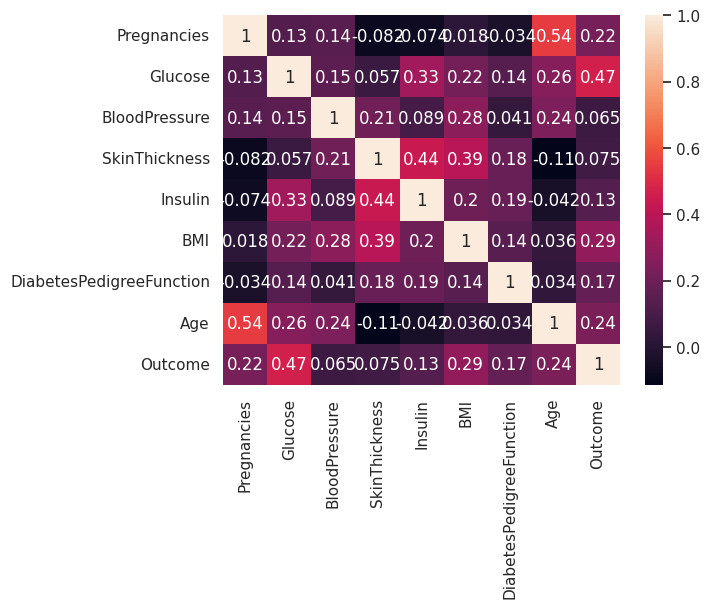

In [ ]:
#Mapa de calor de las correlaciones entre todos nuestros datos
sns.heatmap(datos.corr(), annot=True)

**Observamos que hay un par de datos que tienen una correlación relevante (considerando relevante una correlación arriba de 0.3), estas se presentan entre los datos:**
- Embarazos y edad
- Glucosa e insulina
- Grosor de piel e insulina
- Grosor de piel e índice de masa corporal

**Adicional a esto es importante mencionar que el grosor de la piel no se encuentra tan correlacionado con el diagnóstico por lo cual "a mano" tomaremos las siguientes decisiones con respecto al dataset, con base en ésta revisión:**

- Eliminaremos la columna asosiada al grosor de la piel debido a que está altamente correlacionada con la insulina e indice de masa corporal
- Dado que hay una alta correlación entre los niveles de glucosa e insulina en la sangre, entonces eliminaremos la columna de la insulina en la sangre debido a que tiene mayor correlación los niveles de glucosa con los diagnósticos.
- Eliminaremos la columna de los embarazos debido a su correlación con la edad, dado que la edad tiene mayor correlación con los diagnósticos.


## Reducción de dimensionalidad eliminando columnas

In [ ]:
#Tabla de nuevos datos bajando la dimensionalidad eliminando columnas a nuestra consideración
nueva_data=datos.drop(['SkinThickness','Insulin','Pregnancies'],axis=1)
nueva_data

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,33.6,0.627,50,1
1,85,66,26.6,0.351,31,0
2,183,64,23.3,0.672,32,1
3,89,66,28.1,0.167,21,0
4,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...
763,101,76,32.9,0.171,63,0
764,122,70,36.8,0.340,27,0
765,121,72,26.2,0.245,30,0
766,126,60,30.1,0.349,47,1


**Ahora debido a la desproporción de datos que tenemos en la columna de los diagnósticos, para que haya una proporción adecuada de datos de entrenamiento y de validación haremos lo siguiende:**
- Separaremos el data set en 2, uno que tenga sólo los casos positivos y uno que sólo tenga los negativos.
- A partir de estos dos, tomaremos el 80 porciento para los datos de entrenamiento y el 20 para validación, de ambos data sets.
- Así tendremos una proporción no tan sesgada de datos para usarlos posteriormente para implementar el método

In [ ]:
#Separación del dataset en los disgnosticos postivos y negativos
Positivos=nueva_data[nueva_data.Outcome==1]
Negativos=nueva_data[nueva_data.Outcome==0]

In [ ]:
#Se dividen los datasets en una proporción de 80-20 usando la biblioteca scikit-learn
from sklearn.model_selection import train_test_split
train_Positivos, test_Positivos = train_test_split(Positivos, test_size=0.2, random_state=0)
train_Negativos, test_Negativos = train_test_split(Negativos, test_size=0.2, random_state=0)
#Ahora pegamos los datasets de entrenamiento y validación
Entrenamiento=pd.concat([train_Positivos, train_Negativos])
Validación=pd.concat([test_Positivos,test_Negativos])

**En este momento, separamos nuestros data sets en la variable que queremos predecir y los vectores de características para estandarizar el vector de características y al fin aplicar el modelo de machine learning**

In [ ]:
#Obtenemos las variables de entrenamiento y validación del vector de características y la variable a clasificar
x_test=Validación.iloc[:,0:5].values
x_train=Entrenamiento.iloc[:,0:5].values
y_test=Validación.iloc[:,5].values
y_train=Entrenamiento.iloc[:,5].values

## Implementación del modelo de Naive Bayes para primer caso

In [ ]:
#Estandarizamos los vectores de características para poder aplicar el algoritmo de machine learning
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#Finalmente implementamos el modelo de machine learnign (Naive Bayes)
from sklearn.naive_bayes import GaussianNB
clasificador=GaussianNB()
clasificador.fit(x_train,y_train)
#Se realiza la predicción
y_pred=clasificador.predict(x_test)

In [ ]:
#finalmente se hace el análisis de la calidad de nuestra predicción mediante una matriz de confusión
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[91,  9],
       [24, 30]])

**Observaciones:**
- Se obtuvieron 24 falsos negativos 
- Se obtuvieron 9 falsos positivos
- 91 verdaderos negativos
- 30 verdaderos postivos

**Esto nos deja con un error del 21.4% de nuestro modelo, este error es algo elevado, esto puede deberse a que como mencionamos, nuestros datos son desproporcionales, pues contamos con una mayor proporción de diagnósticos negativos. Adicional a lo anterior mencionado, también el hecho de reducir la dimensionalidad sólo eliminando columnas quizá no es la mejor forma de hacerlo pues estamos eliminando mucha información importante que no se perdería con un método mejor empleado, lo cual haremos a continuación**

## Reducción de dimensionalidad usando PCA (Análisis de componentes principales)

**Una cosa importante a mencionar es que este método supone una gran correlación entre los datos empleados, la cual no se aplica para todos en nuestro caso, sin embargo veremos que tan eficiente es aplicar este método de reducción de dimensionalidad a nuestros vectores de características**

In [ ]:
#Iniciamos partiendo el dataset ORIGINAL en los diagnosticos positivos y los negativos
Positivos=datos[datos.Outcome==1]
Negativos=datos[datos.Outcome==0]
#Obtenemos la separación de los datasets en una proporción de 80-20
from sklearn.model_selection import train_test_split
train_Positivos, test_Positivos = train_test_split(Positivos, test_size=0.2, random_state=0)
train_Negativos, test_Negativos = train_test_split(Negativos, test_size=0.2, random_state=0)
#Ahora pegamos los datasets de entrenamiento y validación
Entrenamiento=pd.concat([train_Positivos, train_Negativos])
Validación=pd.concat([test_Positivos,test_Negativos])

In [ ]:
#En esta parte es cuando separamos los vectores de características de la variable que queremos predecir
x_test=Validación.iloc[:,0:8].values
x_train=Entrenamiento.iloc[:,0:8].values
y_test=Validación.iloc[:,8].values
y_train=Entrenamiento.iloc[:,8].values

**A continuación estandarizaremos los vectores de características para posteriormente aplicarle el PCA**

In [ ]:
#Estandarizamos los vectores de características para poder aplicar el PCA
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Ahora implementaremos el PCA para disminuir la dimensionalidad de 8 a 1**

In [ ]:
#Aplicamos el PCA a los vectores de caracterísiticas para reducir la dimensionalidad
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [ ]:
#Implementamos el algoritmo de Naive Bayes
from sklearn.naive_bayes import GaussianNB
clasificador=GaussianNB()
clasificador.fit(x_train,y_train)
#Se realiza la predicción
y_pred=clasificador.predict(x_test)

In [ ]:
#finalmente se hace el análisis de la calidad de nuestra predicción mediante una matriz de confusión
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[94,  6],
       [39, 15]])

**Observaciones:**
- Se obtienen 6 falsos postivos
- Se obtienen 39 falsos negativos
- Se obtienen 94 verdaderos positivos
- Se obtienen 15 verdaderos positivos

**Esto nos deja con un error del 29.2% lo cual es mayor en comparación a nuestro anterior método para reducir la dimensionalidad, por lo cual podemos mencionar que aplicar PCA para TODOS nuestros datos este caso no fue la mejor decisión**

#Conclusiones finales
Al terminar de implementar el método de machine learning mediante 2 caminos podemos decir lo siguiente:

- Las predicciones dadas al desechar un par de columnas para reducir la dimensión fue más eficiente que usar PCA esto posiblemente debido a que no todos los datos tienen una alta correlación por lo cual se pierde menos información eliminando columnas que obteniendo los componentes principales de todos los datos, esto podría mejorar si aplicamos PCA sólo a aquellos datos que tienen una correlación alta, para que de esta forma podamos perder la menor información
- Adicional a esto, es importante mencionar que el método de Naive Bayes es uno que se tiene que considerar que los datos son independientes entre sí y entonces no hay correlaciones entre ellos, por lo cual al eliminar columnas pudimos reducir este problema de mejor manera que aplicar el PCA a todos los datos. 
- Una razón más por la cual no se pudo obtener un menor error en las predicciones es debido a que hay una clara desproporción en los datos que hay de diagnósticos positivos y negativos, por lo cual es complicado que la máquina prediga casos positivos con tan poco entrenamiento y entonces los clasifica como casos negativos.
- Lo anterior puede ser reparado si se crearan datos de manera artificial para poder compensar la desproporción o realizando una encuesta sin tanto sesgo como lo fue en este caso pues recordemos que además hubo más encuestados jóvenes que personas de tercera edad.